In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [17]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)


Target Distribution

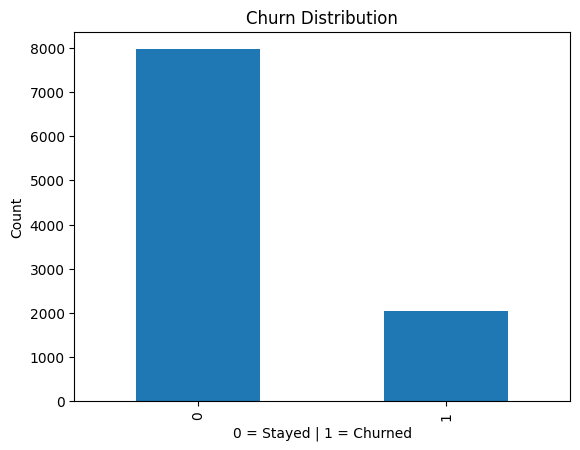

In [19]:
df['Exited'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("0 = Stayed | 1 = Churned")
plt.ylabel("Count")
plt.show()



Geography vs Churn

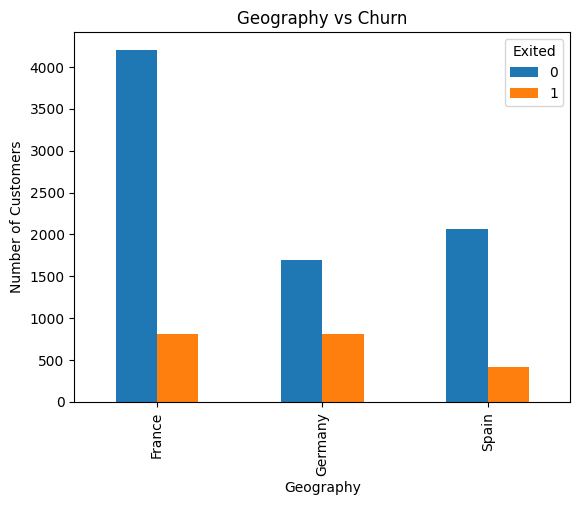

In [20]:
geo_churn = pd.crosstab(df['Geography'], df['Exited'])
geo_churn.plot(kind='bar')
plt.title("Geography vs Churn")
plt.ylabel("Number of Customers")
plt.show()


Gender vs Churn

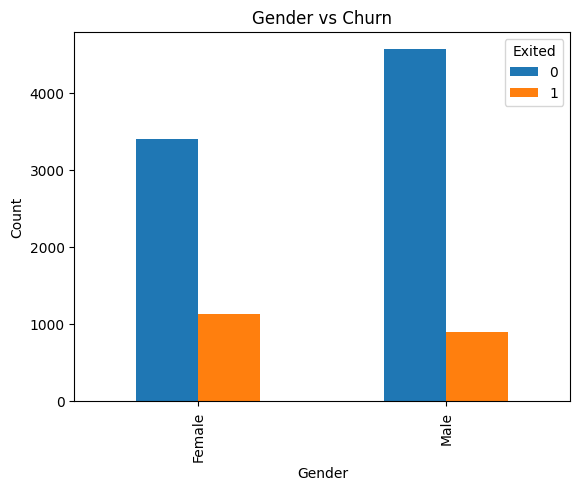

In [21]:
gender_churn = pd.crosstab(df['Gender'], df['Exited'])
gender_churn.plot(kind='bar')
plt.title("Gender vs Churn")
plt.ylabel("Count")
plt.show()


Age Distribution (Churn vs Non-Churn)

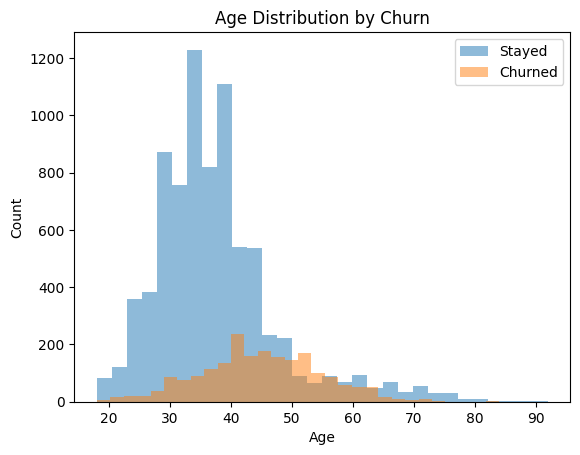

In [22]:
plt.hist(df[df['Exited']==0]['Age'], bins=30, alpha=0.5)
plt.hist(df[df['Exited']==1]['Age'], bins=30, alpha=0.5)
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()


Balance Distribution

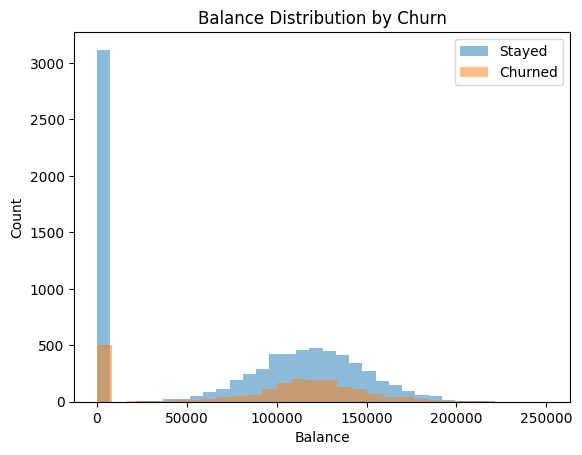

In [23]:
plt.hist(df[df['Exited']==0]['Balance'], bins=30, alpha=0.5)
plt.hist(df[df['Exited']==1]['Balance'], bins=30, alpha=0.5)
plt.title("Balance Distribution by Churn")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()


Number of Products vs Churn

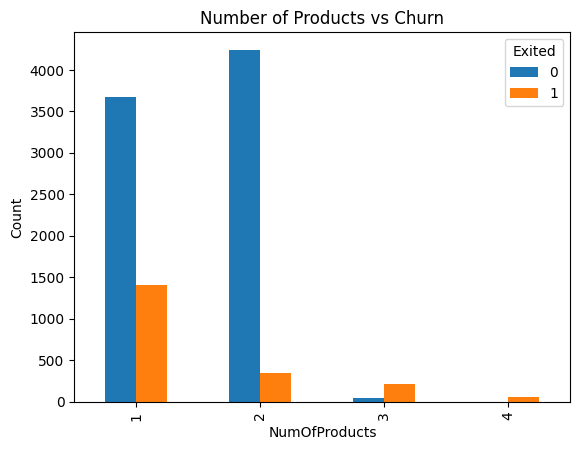

In [24]:
products_churn = pd.crosstab(df['NumOfProducts'], df['Exited'])
products_churn.plot(kind='bar')
plt.title("Number of Products vs Churn")
plt.ylabel("Count")
plt.show()


Correlation Heatmap

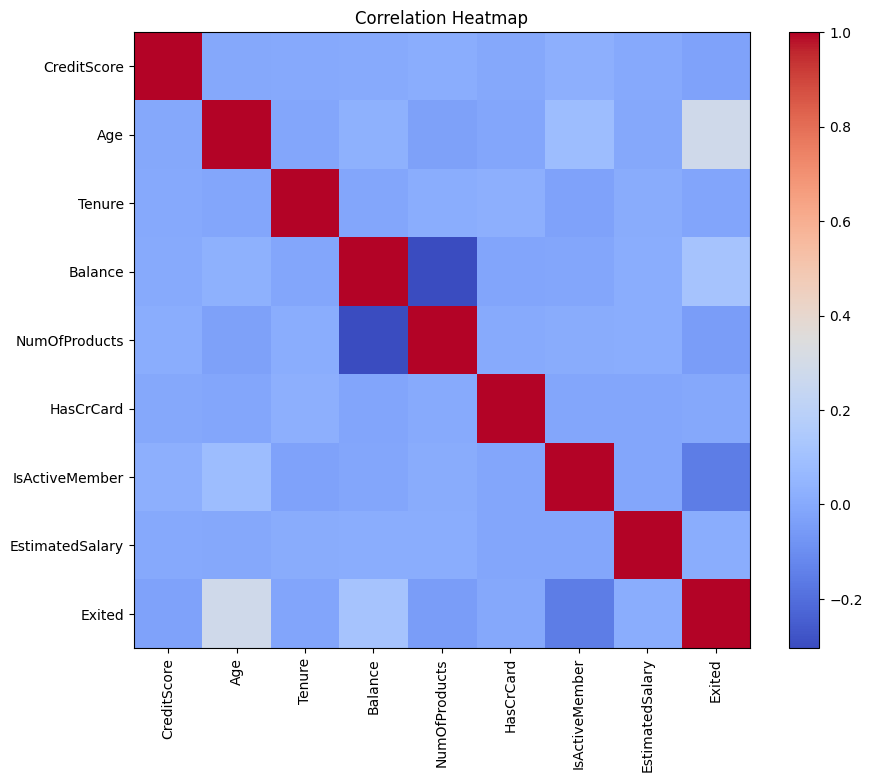

In [27]:
plt.figure(figsize=(10,8))

corr = df.select_dtypes(include=np.number).corr()

plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Heatmap")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()



In [29]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [30]:
X = df.drop("Exited", axis=1)
y = df["Exited"]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.808


In [34]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=6,
    random_state=42
)

rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.859


In [35]:
cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1571   22]
 [ 260  147]]


In [36]:
print(classification_report(y_test, rf_preds))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1593
           1       0.87      0.36      0.51       407

    accuracy                           0.86      2000
   macro avg       0.86      0.67      0.71      2000
weighted avg       0.86      0.86      0.83      2000



ROC Curve

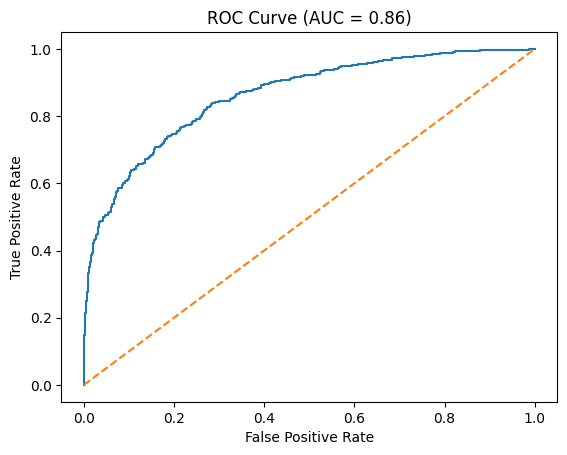

AUC Score: 0.861397607160319


In [38]:
from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve (AUC = %0.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("AUC Score:", roc_auc)

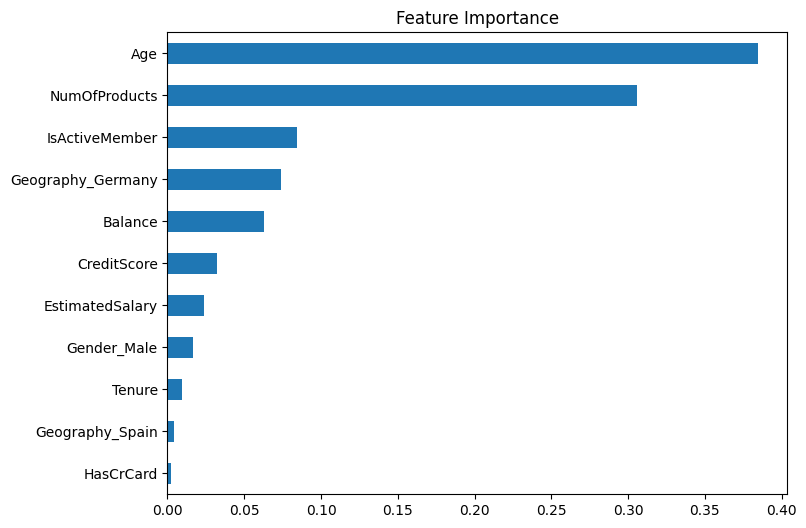

In [39]:
importances = pd.Series(
    rf.feature_importances_,
    index=df.drop("Exited", axis=1).columns
)

importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()
